# **Proyecto No Country *S15-35-T***

# Modelos de Machine Learning

**Librerias**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon


**Carga de datos y creación de dataframe**

In [1]:
df = pd.read_csv('/kaggle/input/paysim1/PS_20174392719_1491204439457_log.csv')

NameError: name 'pd' is not defined

**Primeras 10 filas del dataframe**

In [ ]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


**EDA**

In [ ]:
df.shape

(6362620, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


Descripción de datos

In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


Valores nulos

In [ ]:
any_nulls = df.isna().any().any()
print(f"¿Hay algún valor nulo en el DataFrame? {any_nulls}")

# Verificar si hay algún valor nulo en cada columna
any_nulls_per_column = df.isna().any()
print(any_nulls_per_column)

¿Hay algún valor nulo en el DataFrame? False
step              False
type              False
amount            False
nameOrig          False
oldbalanceOrg     False
newbalanceOrig    False
nameDest          False
oldbalanceDest    False
newbalanceDest    False
isFraud           False
isFlaggedFraud    False
dtype: bool


Codificación de variables categóricas

In [ ]:
# Codificar variables categóricas
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

Escolarización de datos

In [ ]:
# Escalerización características numéricas
scaler = StandardScaler()
df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']] = scaler.fit_transform(
    df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]
)

Se observa cómo quedó la escalerización

In [ ]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,-0.281560,C1231006815,-0.229810,-0.237622,M1979787155,-0.323814,-0.333411,0,0
1,1,3,-0.294767,C1666544295,-0.281359,-0.285812,M2044282225,-0.323814,-0.333411,0,0
2,1,4,-0.297555,C1305486145,-0.288654,-0.292442,C553264065,-0.323814,-0.333411,1,0
3,1,1,-0.297555,C840083671,-0.288654,-0.292442,C38997010,-0.317582,-0.333411,1,0
4,1,3,-0.278532,C2048537720,-0.274329,-0.282221,M1230701703,-0.323814,-0.333411,0,0
5,1,3,-0.284908,C90045638,-0.270068,-0.276696,M573487274,-0.323814,-0.333411,0,0
6,1,3,-0.286084,C154988899,-0.225289,-0.232221,M408069119,-0.323814,-0.333411,0,0
7,1,3,-0.284836,C1912850431,-0.227750,-0.234910,M633326333,-0.323814,-0.333411,0,0
8,1,3,-0.291190,C1265012928,-0.287792,-0.292442,M1176932104,-0.323814,-0.333411,0,0
9,1,2,-0.289015,C712410124,-0.274272,-0.279999,C195600860,-0.311488,-0.322430,0,0


**División del dataset**


In [ ]:
# Definir las características y la variable objetivo
X = df.drop(['isFraud', 'nameOrig', 'nameDest', 'isFlaggedFraud'], axis=1)
y = df['isFraud']



In [ ]:
# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Creación y prueba de los modelos**

**Árbol de decisión**

In [ ]:
# Crear el modelo
clf = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Predecir en el conjunto de prueba
y_pred = clf.predict(X_test)

# Mostrar el reporte de clasificación
print(classification_report(y_test, y_pred))

# Mostrar la matriz de confusión
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.90      0.88      0.89      1620

    accuracy                           1.00   1272524
   macro avg       0.95      0.94      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524

[[1270743     161]
 [    200    1420]]


**Clasificador de aumento de gradiente (GradientBoostingClassifier)**

Se prueban varios hiperparametros para ver cual es mejor los valores que dieron mejor fueron (**END learning_rate=0.1, max_depth=2, min_samples_leaf=5, n_estimators=50, subsample=0.8; total time= 6.4min**)

In [ ]:
'''
# Definir el conjunto de parámetros
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.1, 0.2],
    'max_depth': [2, 3],
    'min_samples_leaf': [1, 5],
    'subsample': [0.8, 1.0]
}

# Crear el modelo
gb_model = GradientBoostingClassifier(random_state=42)

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Entrenar el modelo usando la búsqueda en la cuadrícula
grid_search.fit(X_train, y_train)

# Mejor combinación de parámetros
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Hacer predicciones con el mejor modelo
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluar el mejor modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

'''

'\n# Definir el conjunto de parámetros\nparam_grid = {\n    \'n_estimators\': [50, 100],\n    \'learning_rate\': [0.1, 0.2],\n    \'max_depth\': [2, 3],\n    \'min_samples_leaf\': [1, 5],\n    \'subsample\': [0.8, 1.0]\n}\n\n# Crear el modelo\ngb_model = GradientBoostingClassifier(random_state=42)\n\n# Configurar GridSearchCV\ngrid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)\n\n# Entrenar el modelo usando la búsqueda en la cuadrícula\ngrid_search.fit(X_train, y_train)\n\n# Mejor combinación de parámetros\nbest_params = grid_search.best_params_\nprint("Best parameters found: ", best_params)\n\n# Hacer predicciones con el mejor modelo\nbest_model = grid_search.best_estimator_\ny_pred = best_model.predict(X_test)\n\n# Evaluar el mejor modelo\nprint("Accuracy:", accuracy_score(y_test, y_pred))\nprint("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))\nprint("Classification Report:\n", classification_report(y_test, y_pred))\n\n'

In [ ]:
# Mejor modelo ([CV] END learning_rate=0.1, max_depth=2, min_samples_leaf=5, n_estimators=50, subsample=0.8; total time= 6.4min)
# Crear el modelo con parámetros ajustados
gb_model = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=2, min_samples_leaf=5, subsample=0.8, random_state=42)

# Entrenar el modelo
gb_model.fit(X_train, y_train)

# Hacer predicciones
y_pred = gb_model.predict(X_test)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.999240878757493
Confusion Matrix:
 [[1270884      20]
 [    946     674]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.97      0.42      0.58      1620

    accuracy                           1.00   1272524
   macro avg       0.99      0.71      0.79   1272524
weighted avg       1.00      1.00      1.00   1272524



# **Conclusiones de los modelos**

Para mostrar los resultados de los modelos, vamos a utilizar varias técnicas de visualización y tablas que destacan diferentes aspectos del rendimiento de los modelos:

*     Matriz de Confusión: Muestra el desempeño de los modelos en términos de verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos.

*     Curva ROC y AUC: Para evaluar la capacidad de los modelos para distinguir entre las clases.

*     Importancia de las Características: Muestra qué características son las más importantes para cada modelo.

*     Reporte de Clasificación: Proporciona métricas como precisión, recall, F1-score para cada clase.

*     Comparación de Métricas: Tabla comparativa con métricas clave (exactitud, precisión, recall, F1-score) para ambos modelos.

**Matriz de Confusión**

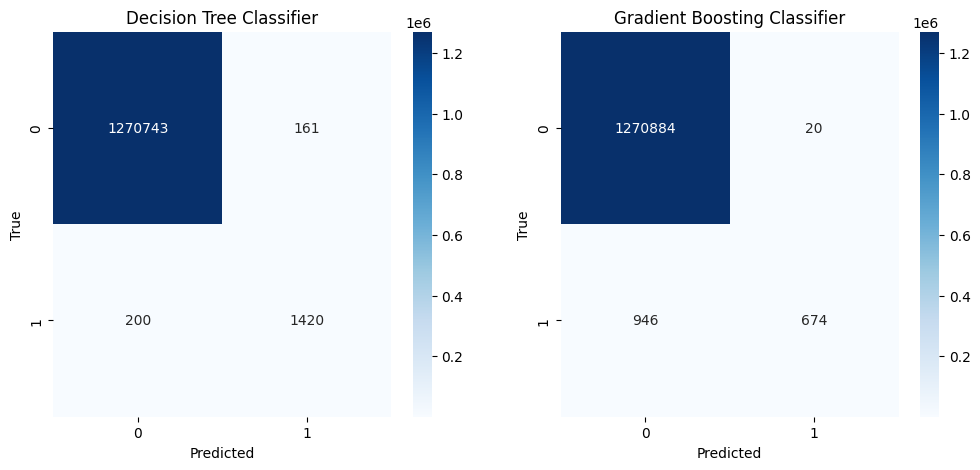

In [ ]:
# Predicciones
y_pred_dt = clf.predict(X_test)
y_pred_gb = gb_model.predict(X_test)

# Crear matrices de confusión
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)

# Plot matriz de confusión
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Decision Tree Classifier')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('True')

sns.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Gradient Boosting Classifier')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('True')

plt.show()

genera archivo con matriz de confusion

In [ ]:
plt.savefig('confusion_matrix.png')
plt.show()

<Figure size 640x480 with 0 Axes>

**Curva ROC y AUC**

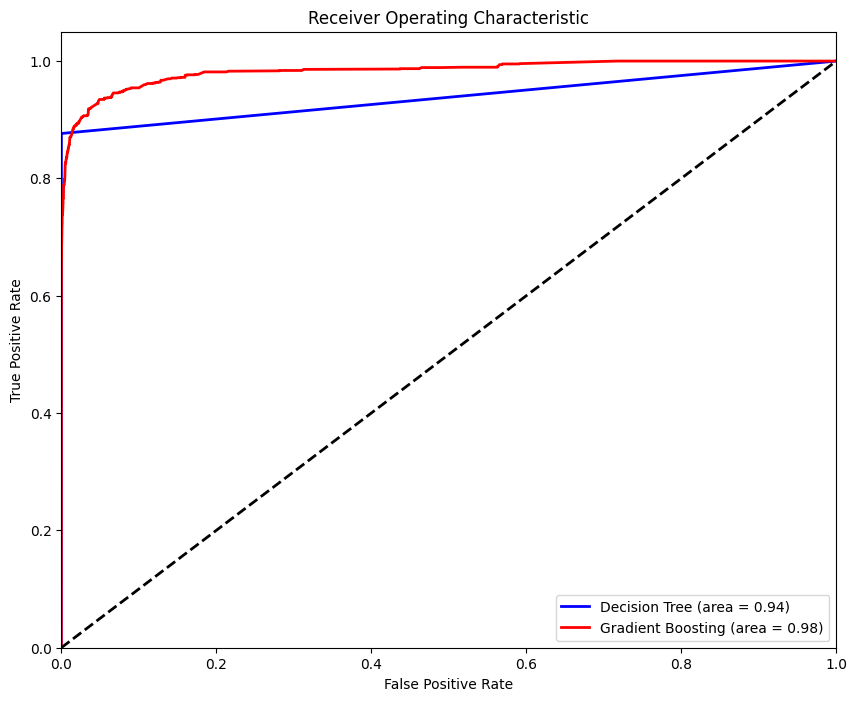

In [ ]:
# Obtener puntuaciones de decisión
y_score_dt = clf.predict_proba(X_test)[:, 1]
y_score_gb = gb_model.predict_proba(X_test)[:, 1]

# Calcular ROC curve y ROC AUC
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_score_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

fpr_gb, tpr_gb, _ = roc_curve(y_test, y_score_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr_dt, tpr_dt, color='blue', lw=2, label='Decision Tree (area = {0:0.2f})'.format(roc_auc_dt))
plt.plot(fpr_gb, tpr_gb, color='red', lw=2, label='Gradient Boosting (area = {0:0.2f})'.format(roc_auc_gb))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Guardo archivo con curva roc

In [ ]:
plt.savefig('roc_curve.png')
plt.show()

<Figure size 640x480 with 0 Axes>

**Importancia de las Características**

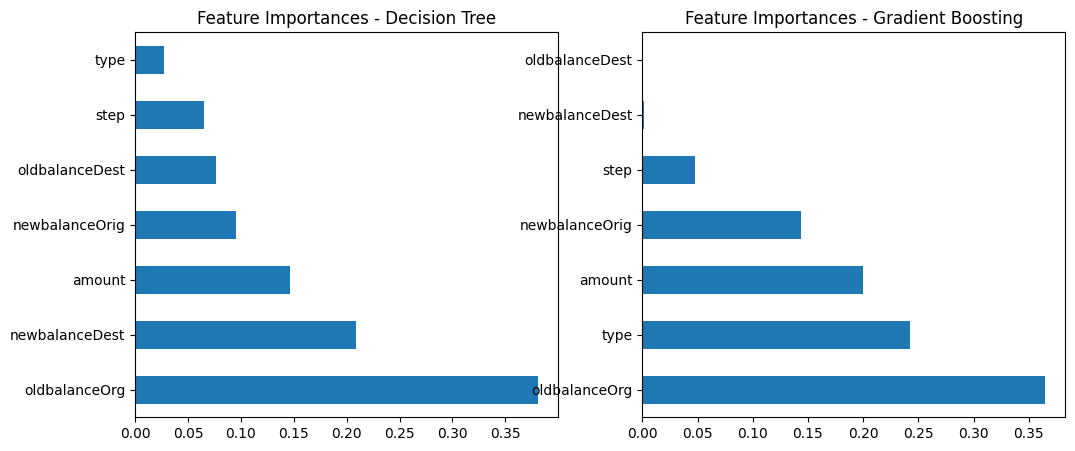

In [ ]:
# Importancia de características
feat_importances_dt = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances_gb = pd.Series(gb_model.feature_importances_, index=X.columns)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
feat_importances_dt.nlargest(10).plot(kind='barh', ax=ax[0])
ax[0].set_title('Feature Importances - Decision Tree')

feat_importances_gb.nlargest(10).plot(kind='barh', ax=ax[1])
ax[1].set_title('Feature Importances - Gradient Boosting')

plt.show()

Guardo imagen con importancia de caracteristicas

In [ ]:
plt.savefig('feature_importances.png')
plt.show()

<Figure size 640x480 with 0 Axes>

**Reporte de Clasificación**

In [ ]:
# Crear reportes de clasificación
report_dt = classification_report(y_test, y_pred_dt)
report_gb = classification_report(y_test, y_pred_gb)

print("Decision Tree Classifier:\n", report_dt)
print("Gradient Boosting Classifier:\n", report_gb)

Decision Tree Classifier:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.90      0.88      0.89      1620

    accuracy                           1.00   1272524
   macro avg       0.95      0.94      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524

Gradient Boosting Classifier:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.97      0.42      0.58      1620

    accuracy                           1.00   1272524
   macro avg       0.99      0.71      0.79   1272524
weighted avg       1.00      1.00      1.00   1272524



**Comparación de Métricas**

In [ ]:
# Extraer métricas clave
metrics = pd.DataFrame({
    'Model': ['Decision Tree', 'Gradient Boosting'],
    'Accuracy': [accuracy_score(y_test, y_pred_dt), accuracy_score(y_test, y_pred_gb)],
    'Precision': [precision_score(y_test, y_pred_dt, average='weighted'), precision_score(y_test, y_pred_gb, average='weighted')],
    'Recall': [recall_score(y_test, y_pred_dt, average='weighted'), recall_score(y_test, y_pred_gb, average='weighted')],
    'F1 Score': [f1_score(y_test, y_pred_dt, average='weighted'), f1_score(y_test, y_pred_gb, average='weighted')]
})

print(metrics)

               Model  Accuracy  Precision    Recall  F1 Score
0      Decision Tree  0.999716   0.999713  0.999716  0.999715
1  Gradient Boosting  0.999241   0.999220  0.999241  0.999089


# *La conclusión es que los dos modelos dieron valores muy parecidos, pero en el que se diferenciaron fue en la curva roc, que dio mejor el Gradient Boosting, esto quiere decir que el modelo no se sobreajuste ni se sub ajusta a los datos sino que trabajó de forma correcta.*